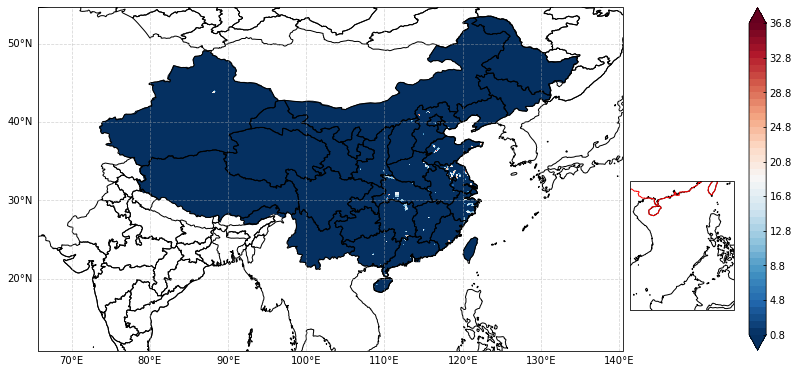

In [64]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

file_path = './data/rada/PRODUCT_RADR_CR_20220101001200.nc'
# 打开nc文件
file_obj = nc.Dataset(file_path)

lon_data = file_obj.variables['longitude'][:]
lat_data = file_obj.variables['latitude'][:]
CR_data = file_obj.variables['CR'][:]

parallels = np.arange(lat_data[0],lat_data[1099],50)
meridians = np.arange(lon_data[0],lon_data[1873],50)
font = {'family':'serif',
        'weight':'normal',
        'size':40,
}
lons_grid, lats_grid = np.meshgrid(lon_data, lat_data)


# 添加中国的海岸线
china = shpreader.Reader('./data/ERA/china0.shp').geometries()
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1 , 1, projection=proj)
ax.add_geometries(china, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=1, zorder=1)

# 绘图开始
ax.set_extent([65.64, 140.56, 10.76, 54.72], crs=ccrs.PlateCarree())

# 自定义颜色条、色阶 
cmap = mpl.cm.RdBu_r
newcolors=cmap(np.linspace(0, 1, 256))
newcmp = ListedColormap(newcolors[20:226])

# 绘制制定区域内的浓度图像
cf = ax.contourf(lons_grid, lats_grid, CR_data, levels=50, cmap=cmap, 
                 transform=proj, extend='both') 
cb = fig.colorbar(cf, shrink=0.7, orientation='vertical', pad=0.15)  # 设置颜色条的位置和标签
cb.ax.set_xlabel('T2M(kg/$cm^2$)', fontweight='bold')
cb.ax.tick_params(which='major', direction='in', length=3)

# 添加小格子
gl = ax.gridlines(alpha=0.5, linestyle='--', draw_labels=True, 
                   dms=True, x_inline=False, y_inline=False)
gl.right_labels = 0
gl.top_labels = 0

ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1)
ax.add_feature(cfeature.STATES.with_scale('50m'))
# ax.add_feature(cfeature.OCEAN.with_scale('50m'))
# ax.add_feature(cfeature.LAND.with_scale('50m'))
# ax.add_feature(cfeature.RIVERS.with_scale('50m'))
# ax.add_feature(cfeature.LAKES.with_scale('50m'))

# 南海群岛
ax_sub = fig.add_axes([0.6615,0.3,0.12,0.2], projection=proj)  # [*left*, *bottom*, *width*,*height*]
ax_sub.set_extent([105,125,0,25], crs=ccrs.PlateCarree())
ax_sub.add_feature(cfeature.COASTLINE.with_scale('50m'))
china2 = shpreader.Reader('./data/ERA/china0.shp').geometries()
ax_sub.add_geometries(china2, ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=1, zorder=1)

import maskout
clip=maskout.shp2clip(cf, ax, r'./data/ERA/china0') # 白化

plt.show()


In [47]:
cmap = mpl.cm.RdBu_r
newcolors=cmap(np.linspace(0, 1, 256))
newcmp = ListedColormap(newcolors[30:226])

In [54]:
type(cmap)

matplotlib.colors.LinearSegmentedColormap

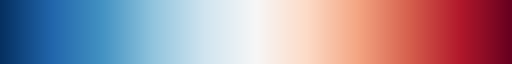

In [56]:
cmap